## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# **Install YOLOv8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Roboflow

To download a dataset from Roboflow, you can generally follow these steps:

1.  **Create a Roboflow Account and Log In:** Go to the Roboflow website and create an account or log in with your existing one.
2.  **Select Your Dataset:** Find and select the dataset you want to download.
3.  **Choose a Version:** There might be different versions of the dataset; choose the version you want to download.
4.  **Export:** Find the option to export the dataset. Here, you will be offered various formats (YOLO, COCO, Pascal VOC, etc.). Choose the format you need. If you are using YOLO in Colab, selecting the YOLO format would be appropriate.
5.  **Generate Download Code:** Roboflow will provide you with a code snippet that you can use to download the dataset. This code usually includes your API key and dataset information.
6.  **Paste and Run the Code in Colab:** Paste the code provided by Roboflow into your Colab notebook and run it. This code will download the dataset to your Colab environment.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("py-py-nu9e5").project("plane2-gddnu")
dataset = project.version(9).download("yolov8")




## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=200 imgsz=640 plots=True batch=-1 workers=16

In [ ]:
!ls {HOME}/runs/detect/train/

/content


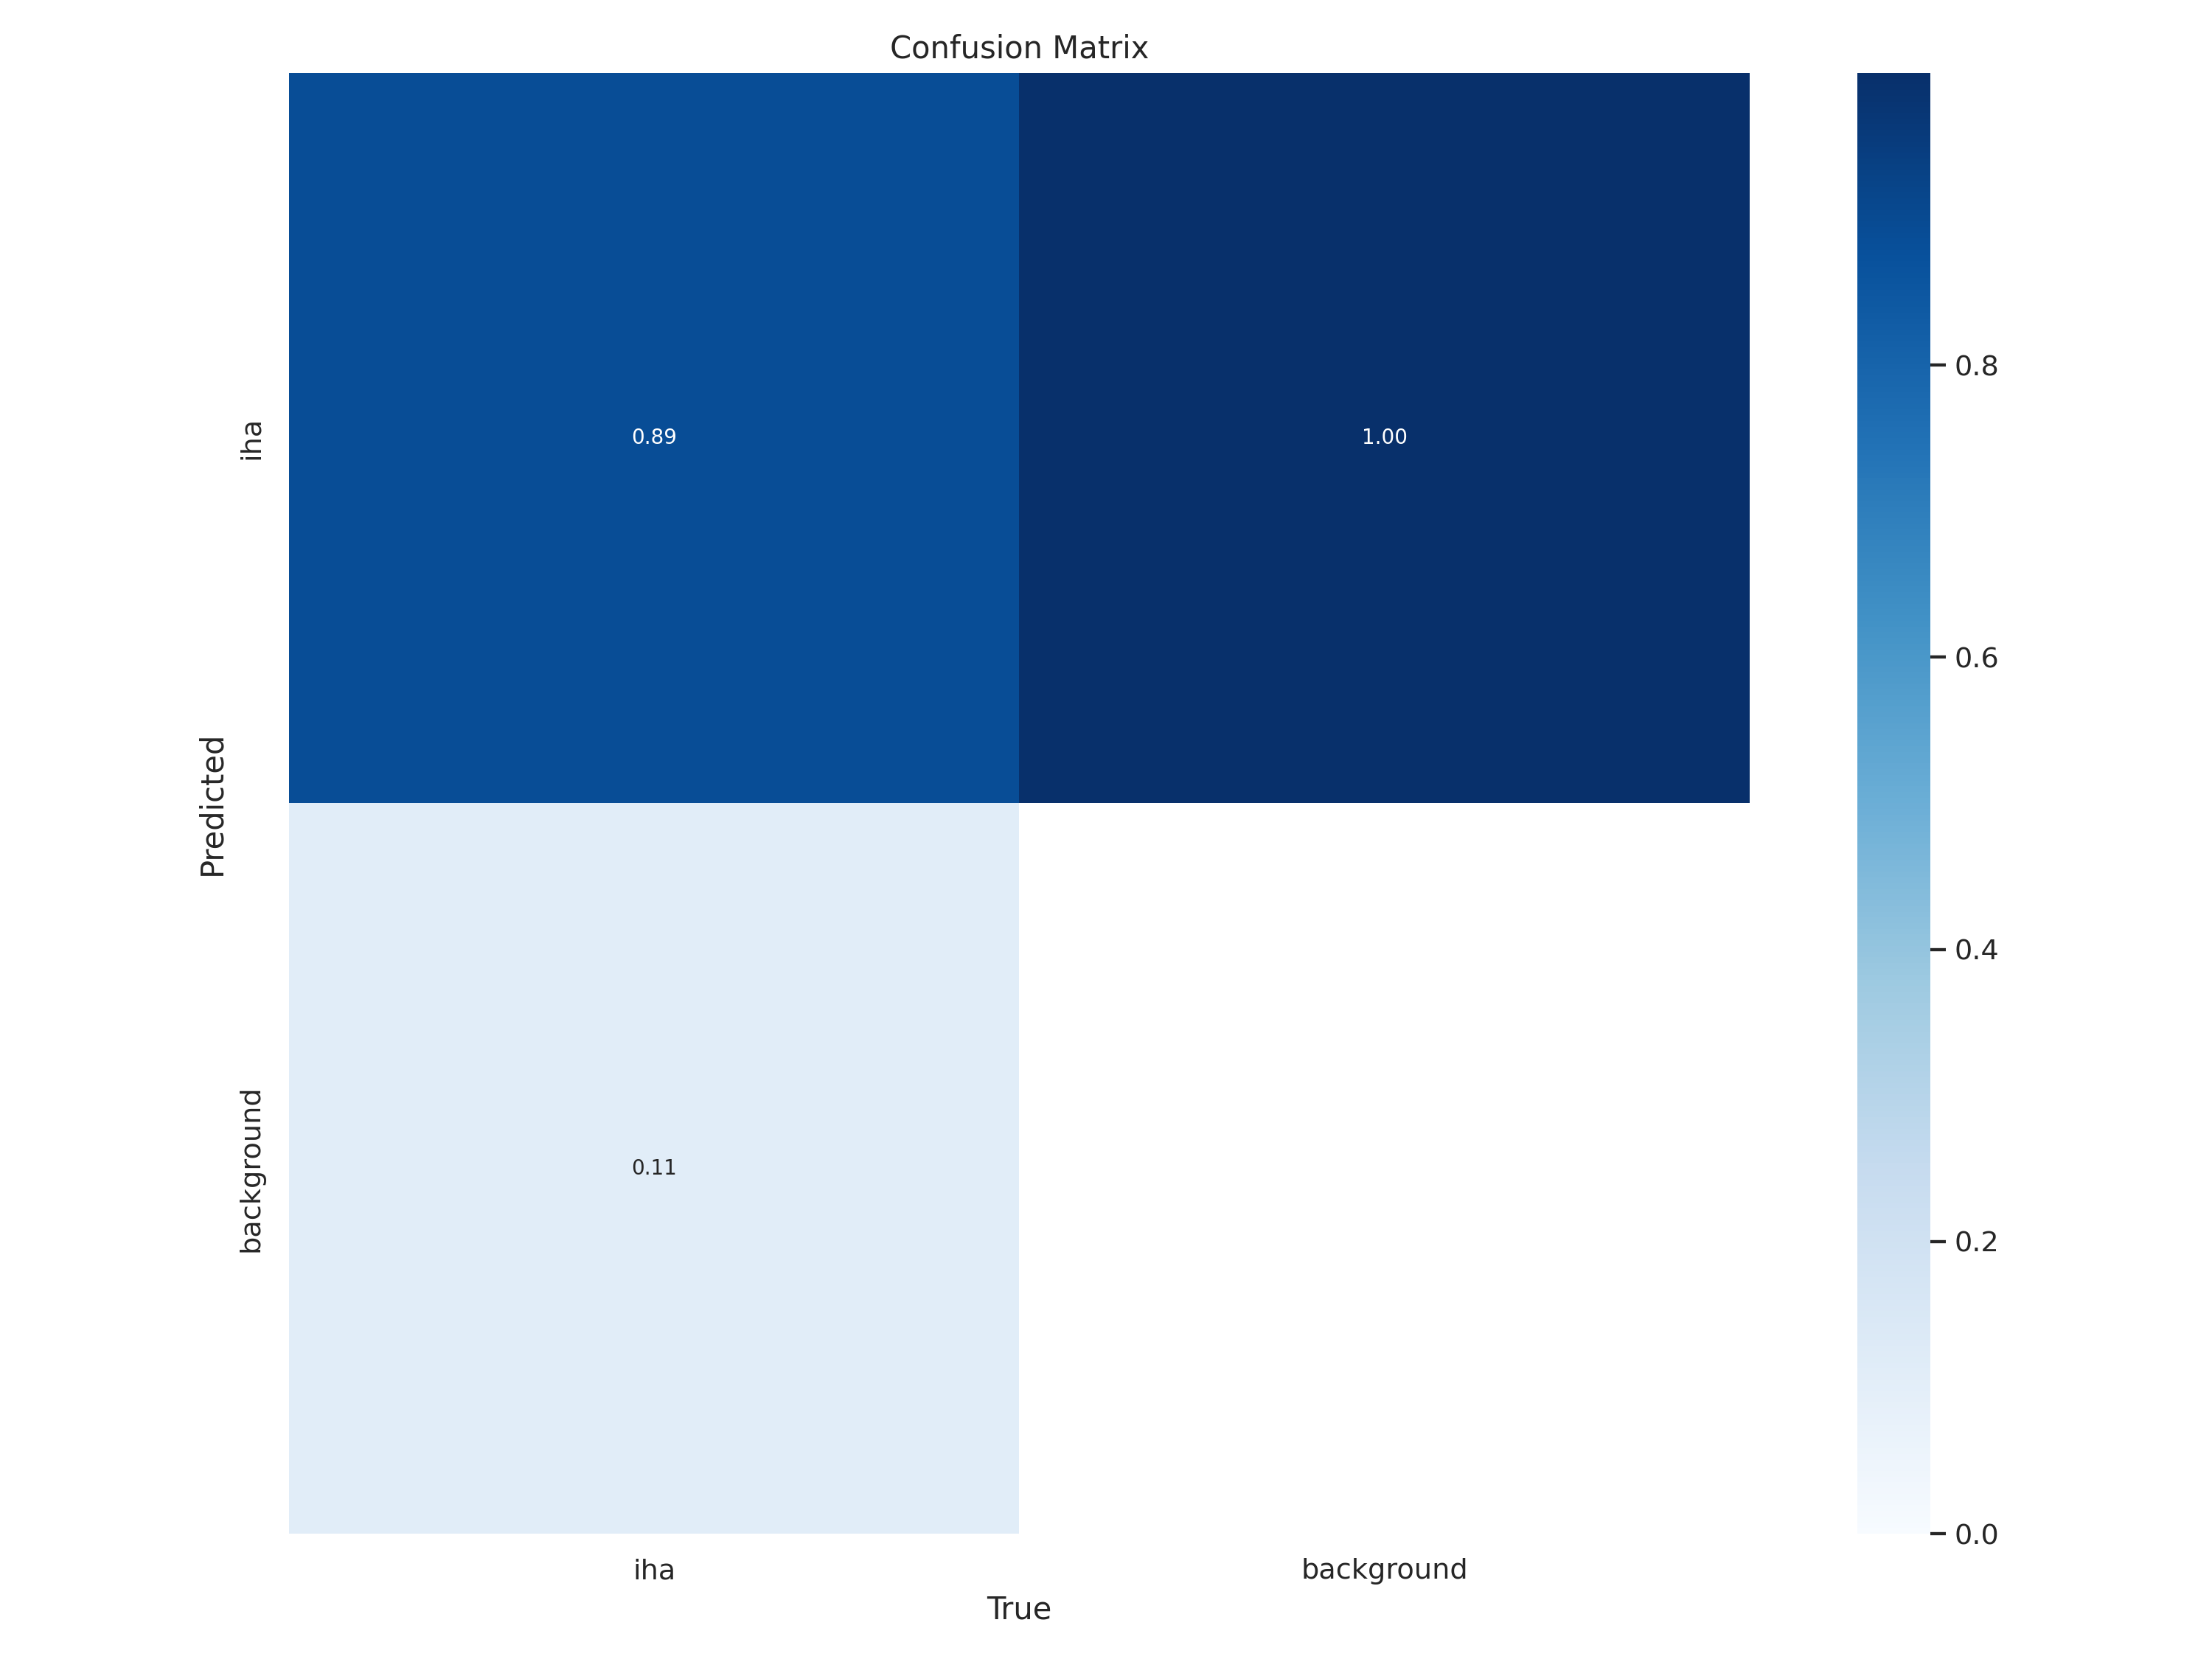

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


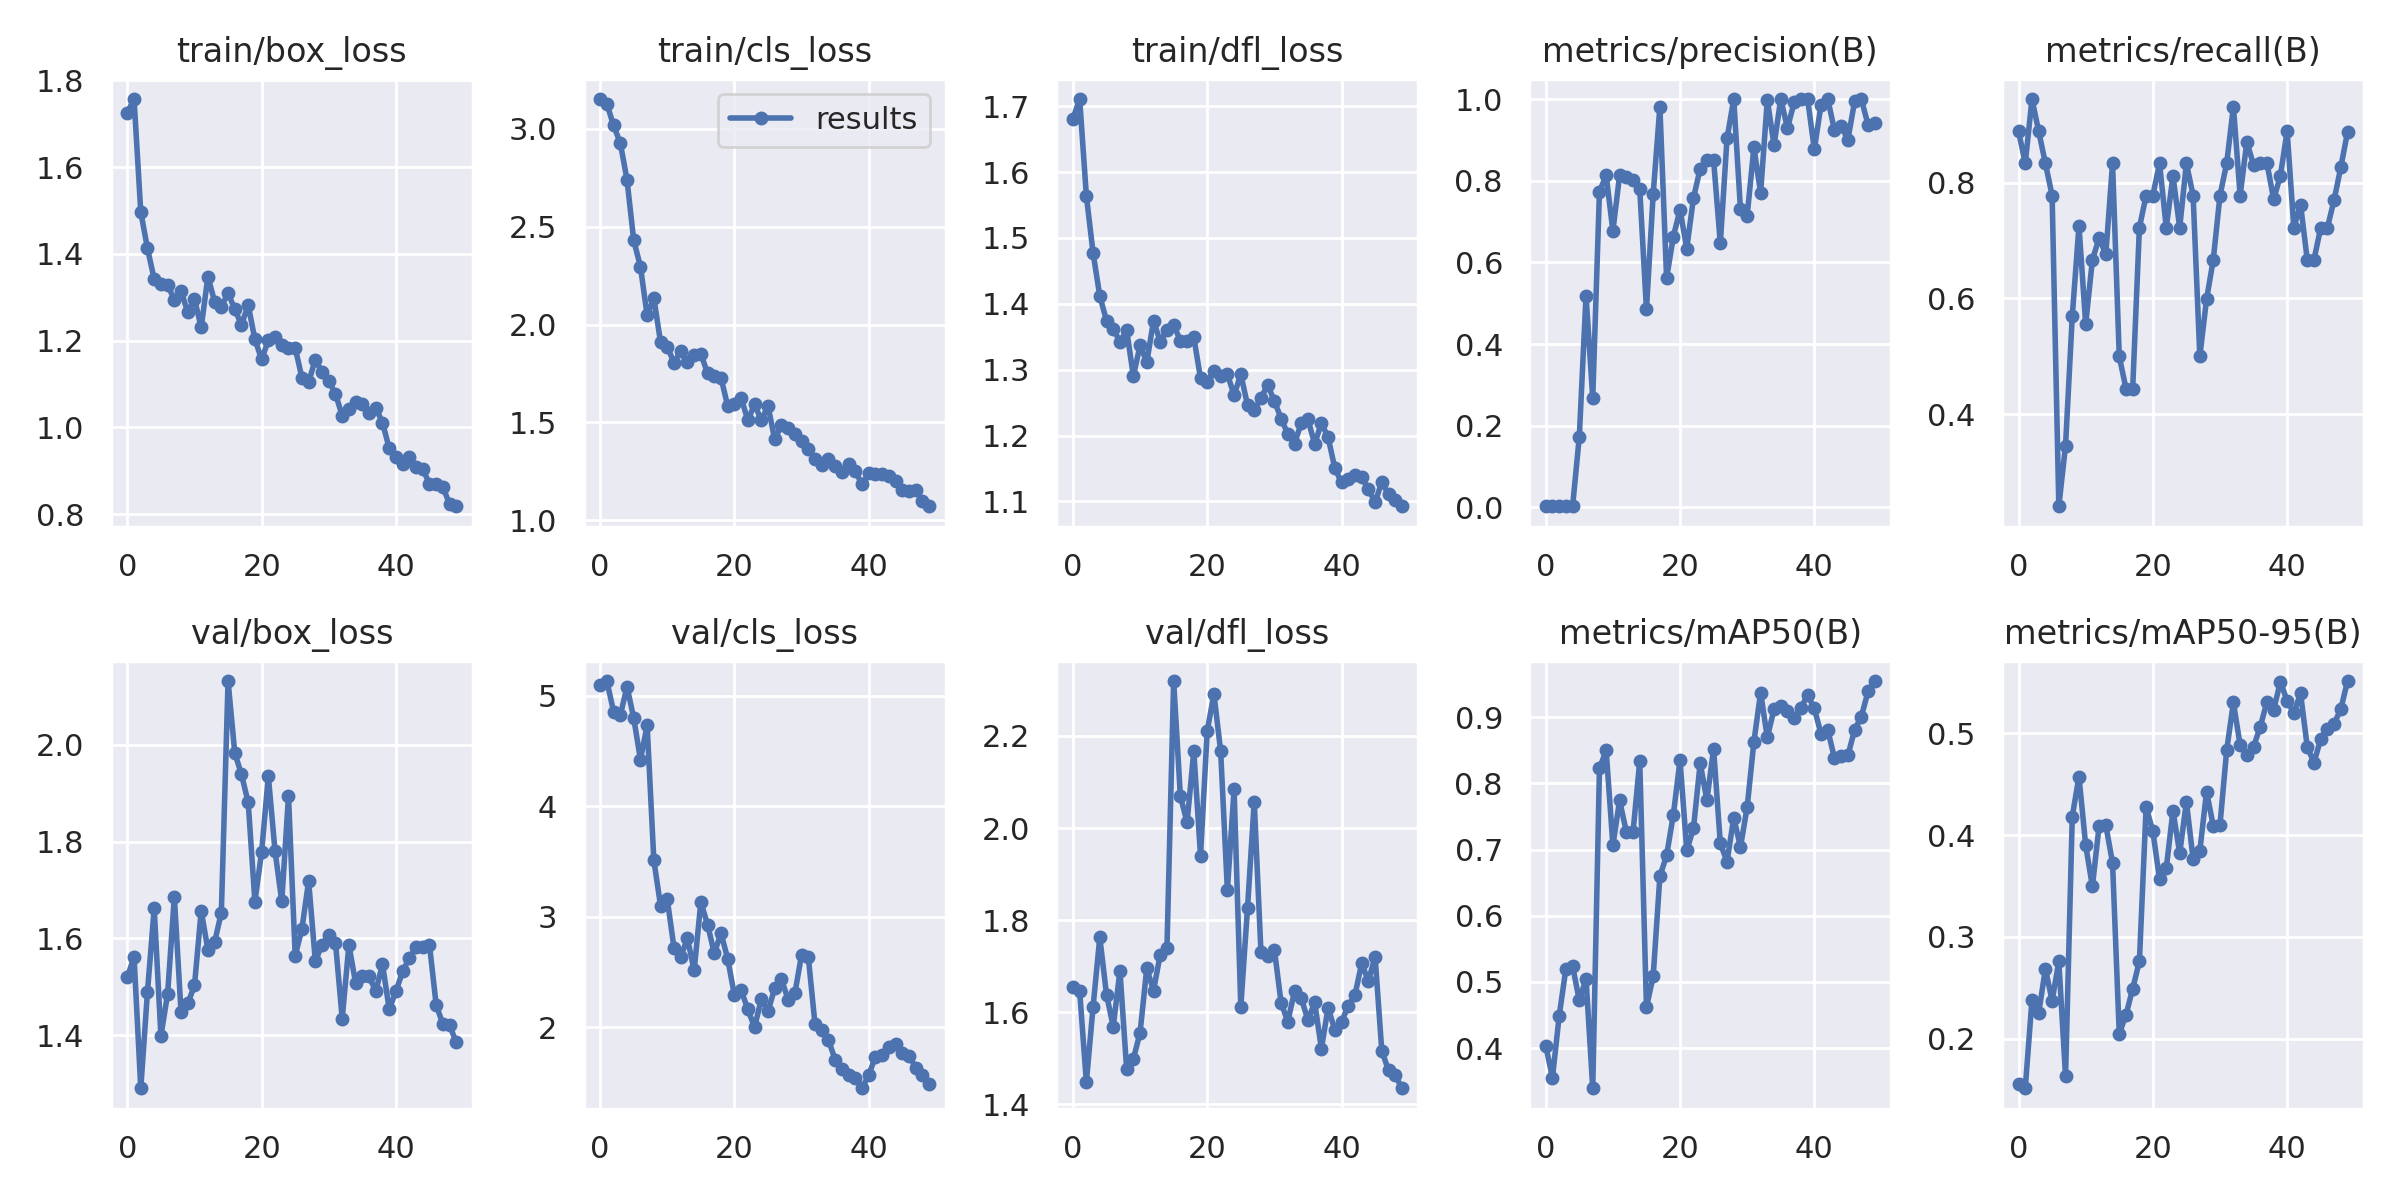

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


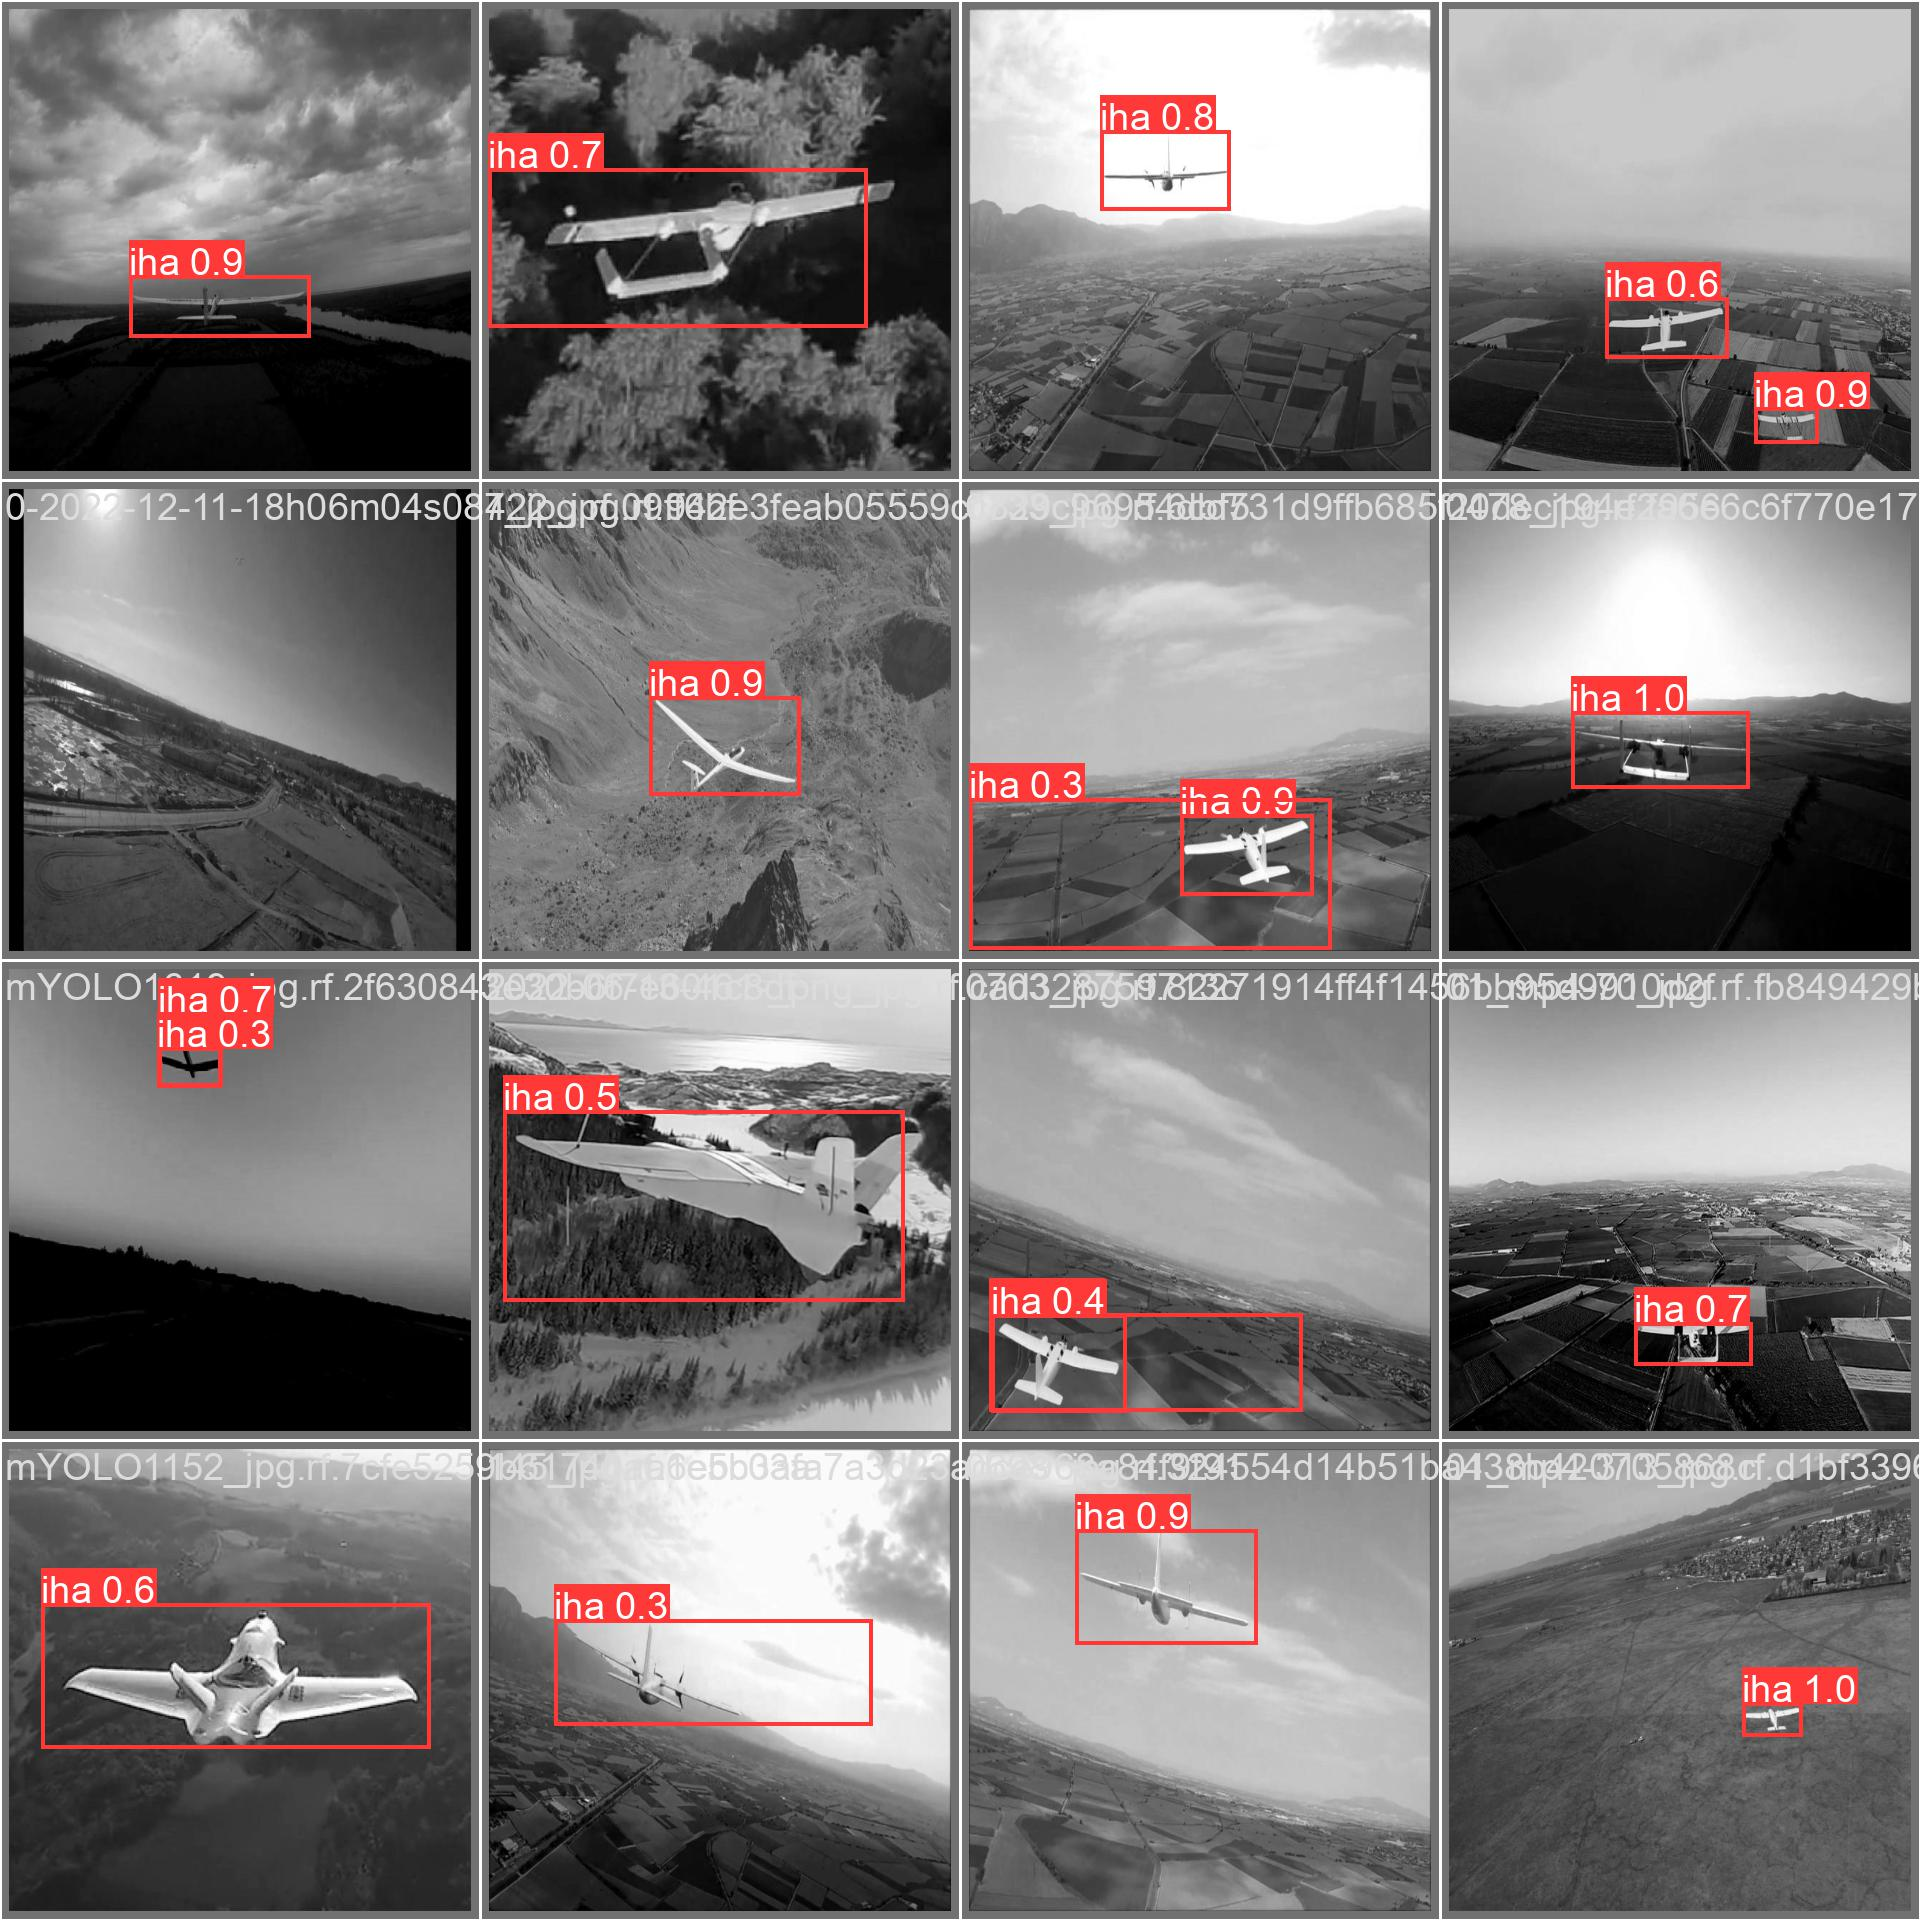

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validate Custom **Model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-13 13:24:51.640803: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/TEST-1/valid/labels.cache... 148 images, 0 backgrounds, 0 corrupt: 100% 148/148 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:04<00:00,  2.13it/s]
                   all        148        148       0.98       0.98      0.994      0.674
Speed: 4.6ms pre-process, 7.1ms inference, 0.0ms loss, 3.6ms post-process per image


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True